In [1]:
%matplotlib notebook
from plotter import *

data = pickle.load(open('plot_data.pkl','rb'))

C:\Users\q4fj4lj9\AppData\Local\Continuum\Miniconda\lib\site-packages\IPython\kernel\__init__.py:13: ShimWarning: The `IPython.kernel` package has been deprecated. You should import from ipykernel or jupyter_client instead.
  "You should import from ipykernel or jupyter_client instead.", ShimWarning)


<IPython.core.display.Javascript object>


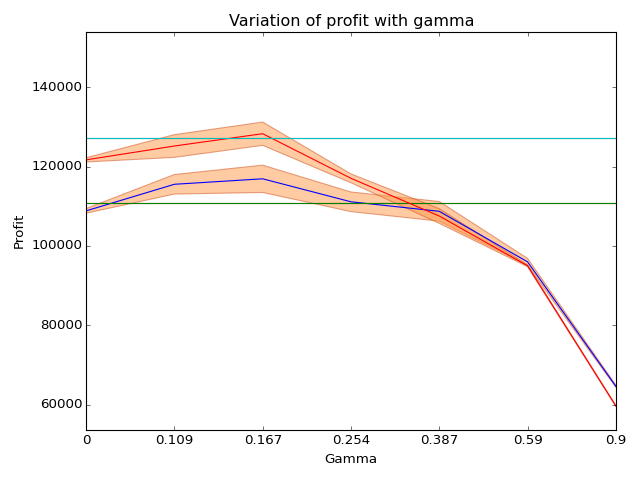

In [2]:
plot_result_all(data)

In [ ]:
#Single coeff val plot
coeff_indices = [x for x in data['profits_given_coeffs']]
data_matrix = data['profits_given_coeffs'][coeff_indices[0]]['total_profit_array'].transpose()
GAMMA_ARRAY_ALL = data['instance_base']['instance_params']['GAMMA_ARRAY_ALL']
plot_result_single(data_matrix,GAMMA_ARRAY_ALL)

In [ ]:
print numpy.std([1,2,1,2,1,2,1,2,1,2])
print numpy.std([1,2])
print numpy.mean([1,2,1,2,1,2,1,2,1,2])
a = numpy.asarray([1,2,1,2,1,2,1,2,1,2])
a_mean = numpy.asarray([sum(a)*1.0/len(a)]*len(a))
print a_mean
print numpy.linalg.norm(a - a_mean)/math.sqrt(len(a))